In [4]:
import netCDF4 as nc4

In [1]:
file_path =['C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_01.nc']
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_02.nc')
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_03.nc')
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_04.nc')
# file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_05.nc')
# file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_06.nc')

In [2]:
file_path

['C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_01.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_02.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_03.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_04.nc']

In [8]:
ds = nc4.MFDataset(file_path)
eta_t_arr = ds.variables['eta_t'][:]

In [9]:
eta_t_arr.shape

(121, 1500, 3600)

In [12]:
time_ytocean_arr = eta_t_arr[:,:,1]
time_ytocean_arr.shape

(121, 1500)

In [13]:
from sklearn.model_selection import train_test_split
time_ytocean_train, time_ytocean_test = train_test_split(time_ytocean_arr, test_size=0.33)
time_ytocean_train.shape

(81, 1500)

In [14]:
input_size = 1500
hidden_size = 150
output_size = 1500

In [16]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape

x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1500)]            0         
_________________________________________________________________
dense (Dense)                (None, 150)               225150    
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              226500    
Total params: 451,650
Trainable params: 451,650
Non-trainable params: 0
_________________________________________________________________


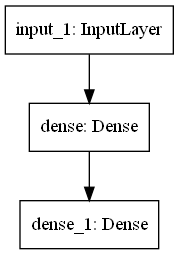

In [19]:
import keras
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils
keras.utils.plot_model(autoencoder, "time_ytocean_autoencoder.png")

In [20]:
epochs = 100
batch_size = 1500

history = autoencoder.fit(time_ytocean_train, time_ytocean_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(time_ytocean_test, time_ytocean_test))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 345039328.0000 - val_loss: 345039488.0000
Epoch 2/100
1/1 [==============================] - 0s 51ms/step - loss: 345039488.0000 - val_loss: 345039040.0000
Epoch 3/100
1/1 [==============================] - 0s 60ms/step - loss: 345039040.0000 - val_loss: 345039232.0000
Epoch 4/100
1/1 [==============================] - 0s 51ms/step - loss: 345039232.0000 - val_loss: 345039232.0000
Epoch 5/100
1/1 [==============================] - 0s 51ms/step - loss: 345039232.0000 - val_loss: 345039424.0000
Epoch 6/100
1/1 [==============================] - 0s 50ms/step - loss: 345039392.0000 - val_loss: 345039296.0000
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 345039296.0000 - val_loss: 345039168.0000
Epoch 8/100
1/1 [==============================] - 0s 48ms/step - loss: 345039136.0000 - val_loss: 345039168.0000
Epoch 9/100
1/1 [==============================] - 0s 49ms/step - loss: 345039136.0000 - v

dict_keys(['loss', 'val_loss'])


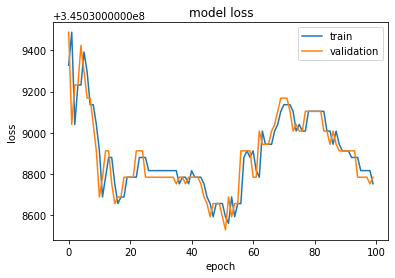

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()